In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn import tree
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
data=pd.read_csv('E:/rahul/processed_data/South_india.csv',index_col=[0])
data

,BT_6V,BT_6H,BT_10V,BT_10H,BT_18V,BT_18H,BT_36V,BT_36H,BT_89V,BT_89H,MODIS_LST,SM,VegWater,PR6,PR10,PR18,PR36,PR89
0,302.9,280.2,301.7,282.7,303.8,290.7,301.5,293.2,303.2,299.3,316.737305,0.091,2.07,0.925058,0.937024,0.956880,0.972471,0.987137
1,303.5,280.9,300.3,281.1,302.5,289.1,300.4,291.5,303.7,299.4,316.907104,0.088,1.95,0.925535,0.936064,0.955702,0.970373,0.985841
2,308.2,289.1,298.2,279.3,300.5,287.0,298.6,289.2,301.2,296.9,315.573120,0.088,1.76,0.938027,0.936620,0.955075,0.968520,0.985724
3,316.3,303.8,297.3,279.5,299.4,286.4,297.3,288.1,299.9,294.8,314.346863,0.085,1.67,0.960481,0.940128,0.956580,0.969055,0.982994
4,313.8,298.3,298.1,280.9,300.2,287.8,297.2,288.9,297.2,293.3,312.924072,0.081,1.76,0.950605,0.942301,0.958694,0.972073,0.986878
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13003,299.5,275.1,298.5,278.2,300.0,287.3,297.1,289.1,297.8,295.2,317.833405,0.098,2.65,0.918531,0.931993,0.957667,0.973073,0.991269
13004,299.1,274.4,298.1,277.9,300.1,287.3,297.9,289.5,299.1,296.6,318.501984,0.108,2.57,0.917419,0.932238,0.957348,0.971803,0.991642
13005,299.2,274.8,298.1,278.5,299.6,287.5,296.6,289.1,296.9,294.5,314.198395,0.098,2.76,0.918449,0.934250,0.959613,0.974713,0.991916
13006,299.4,275.8,298.4,279.3,300.1,288.1,297.6,289.9,298.0,295.9,314.989716,0.105,2.64,0.921176,0.935992,0.960013,0.974126,0.992953


In [3]:
data['(36V-18V)^2']=(data['BT_36V']-data['BT_18V'])**2

In [4]:
# correlation matrix
correlation_matrix=data.corr()
correlation_matrix

,BT_6V,BT_6H,BT_10V,BT_10H,BT_18V,BT_18H,BT_36V,BT_36H,BT_89V,BT_89H,MODIS_LST,SM,VegWater,PR6,PR10,PR18,PR36,PR89,(36V-18V)^2
BT_6V,1.000000,0.706881,0.902436,0.707383,0.890023,0.798186,0.865702,0.834992,0.639430,0.598069,0.695800,-0.528674,-0.044823,-0.228920,-0.224399,-0.186993,0.010353,-0.299627,0.489434
BT_6H,0.706881,1.000000,0.568021,0.834190,0.518417,0.769785,0.478689,0.696503,0.245094,0.290480,0.293277,-0.202790,0.145106,0.526247,0.450132,0.464409,0.581071,0.061384,0.170282
BT_10V,0.902436,0.568021,1.000000,0.773257,0.988003,0.881559,0.971562,0.932071,0.761296,0.733361,0.799402,-0.547702,-0.014331,-0.299254,-0.265831,-0.217277,-0.002258,-0.295332,0.509380
BT_10H,0.707383,0.834190,0.773257,1.000000,0.727019,0.964617,0.691198,0.905115,0.443576,0.504286,0.456987,-0.279293,0.167055,0.305535,0.405391,0.433597,0.590710,0.049292,0.254843
BT_18V,0.890023,0.518417,0.988003,0.727019,1.000000,0.859872,0.992048,0.922936,0.804323,0.768812,0.822631,-0.572891,-0.081078,-0.353705,-0.319723,-0.281692,-0.073451,-0.329520,0.499180
BT_18H,0.798186,0.769785,0.881559,0.964617,0.859872,1.000000,0.834843,0.980153,0.576820,0.625645,0.574728,-0.397921,0.170766,0.106624,0.195277,0.247405,0.436091,-0.023076,0.317218
BT_36V,0.865702,0.478689,0.971562,0.691198,0.992048,0.834843,1.000000,0.914162,0.850981,0.819103,0.825482,-0.562882,-0.091000,-0.380257,-0.351564,-0.314712,-0.114749,-0.332437,0.417663
BT_36H,0.834992,0.696503,0.932071,0.905115,0.922936,0.980153,0.914162,1.000000,0.685599,0.721321,0.651780,-0.451607,0.133473,-0.039581,0.031866,0.090291,0.297638,-0.091428,0.303999
BT_89V,0.639430,0.245094,0.761296,0.443576,0.804323,0.576820,0.850981,0.685599,1.000000,0.948958,0.806342,-0.416322,-0.279033,-0.433765,-0.428665,-0.446171,-0.326878,-0.428428,0.234101
BT_89H,0.598069,0.290480,0.733361,0.504286,0.768812,0.625645,0.819103,0.721321,0.948958,1.000000,0.711079,-0.367118,-0.114341,-0.320942,-0.297022,-0.288578,-0.166402,-0.121608,0.153413


In [5]:
y0=data['MODIS_LST']
x0=data[["BT_6V","BT_6H","BT_10V","BT_10H","BT_18V","BT_18H","BT_36V","BT_36H","BT_89V","BT_89H","(36V-18V)^2"]]
# x0=data.drop(['MODIS_LST','SM','VegWater'],axis='columns')
X_train, X_test, Y_train, Y_test = train_test_split(x0, y0, test_size=0.30, random_state=42)

In [6]:
sc_X=StandardScaler()  
sc_Y=StandardScaler()  
X_train_sc=sc_X.fit_transform(X_train)
Y_train=np.array(Y_train).reshape(-1,1)
Y_train_sc=sc_Y.fit_transform(Y_train)

# LinearRegression

In [7]:
reg = LinearRegression().fit(X_train_sc, Y_train_sc)
Y_pred=sc_Y.inverse_transform(reg.predict(sc_X.transform(X_test)))
print("R2-: ",reg.score(sc_X.fit_transform(X_test),sc_Y.fit_transform(np.array(Y_test).reshape(-1,1))))
print("coeff: ", reg.coef_)
print("intercept: ",reg.intercept_)

R2-:  0.8103773482009781
coeff:  [[-0.30771471  0.20882012  0.0389396   0.59418621  0.8586488  -0.60184892
   0.73703942 -0.90818926  0.40707891 -0.12663791  0.10862835]]
intercept:  [-1.04963077e-14]


In [8]:
RMSE=np.round(mean_squared_error(Y_test,Y_pred,squared=False),decimals=3)
print("RMSE: ",RMSE,"K")

RMSE:  2.257 K


In [9]:
error=Y_test-Y_pred.reshape(-1)


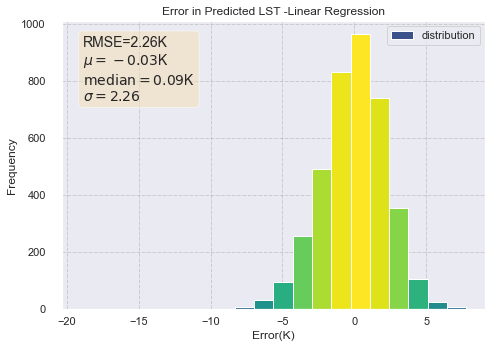

In [10]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
  
  
N_points = 10000
n_bins = 20
  
# Creating distribution
legend = ['distribution']
  
# Creating histogram
fig, axs = plt.subplots(1, 1,
                        figsize =(7,5), 
                        tight_layout = True)
  
axs.xaxis.set_tick_params(pad = 2) 
axs.yaxis.set_tick_params(pad = 10) 
  
# Add x, y gridlines 
axs.grid(b = True, color ='grey', 
        linestyle ='-.', linewidth = 0.5, 
        alpha = 0.6) 
  
mu = error.mean()
median = np.median(error)
sigma = error.std()

textstr = '\n'.join((r'RMSE=%.2fK' % (RMSE, ),
    r'$\mu=%.2f$K' % (mu, ),
    r'$\mathrm{median}=%.2f$K' % (median, ),
    r'$\sigma=%.2f$' % (sigma, )))

# these are matplotlib.patch.Patch properties
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

# place a text box in upper left in axes coords
axs.text(0.05, 0.95, textstr, transform=axs.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)

# Creating histogram
N, bins, patches = axs.hist(error, bins = n_bins)
  
# Setting color
fracs = ((N**(1 / 5)) / N.max())
norm = colors.Normalize(fracs.min(), fracs.max())
  
for thisfrac, thispatch in zip(fracs, patches):
    color = plt.cm.viridis(norm(thisfrac))
    thispatch.set_facecolor(color)
  
plt.xlabel("Error(K)")
plt.ylabel("Frequency")
plt.legend(legend)
plt.title('Error in Predicted LST -Linear Regression')
plt.show()

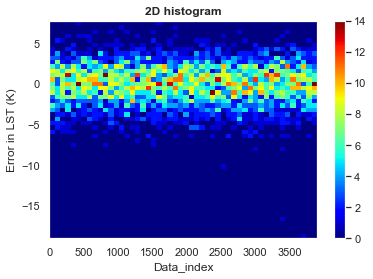

In [11]:
plt.hist2d(np.arange(0,len(error)),error, (50, 50), cmap=plt.cm.jet)
plt.colorbar()
plt.xlabel("Data_index")
plt.ylabel("Error in LST (K)")
plt.title('2D histogram', fontweight ="bold")
  
plt.show()

# PCA

In [12]:
from sklearn.decomposition import PCA

In [13]:
pca = PCA(n_components=3, svd_solver='full')
l=pca.fit_transform(x0)
print(pca.explained_variance_ratio_)

[0.77209014 0.12473411 0.04933443]


# Support vector regression

In [14]:
regressor=SVR(C=100, gamma=0.1,kernel='rbf')
regressor.fit(X_train_sc,Y_train_sc)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVR(C=100, gamma=0.1)

In [15]:
Y_pred=sc_Y.inverse_transform(regressor.predict(sc_X.transform(X_test)))
print("R-Square: ",r2_score(Y_test,Y_pred))

R-Square:  0.8509825671612963


In [16]:
df=pd.DataFrame({})
df['MOD_LST']=Y_test
df['pred_LST']=Y_pred
df['Error']=Y_test-Y_pred
df.describe()

,MOD_LST,pred_LST,Error
count,3903.000000,3903.000000,3903.000000
mean,319.291500,319.376165,-0.084664
std,5.179573,4.865023,1.997665
min,302.241119,302.298747,-8.854141
25%,315.773758,316.318526,-1.290761
50%,319.404877,319.365874,0.015441
75%,323.056931,322.944116,1.272152
max,333.397095,333.415792,7.071212


In [17]:
RMSE=np.round(mean_squared_error(Y_test,Y_pred,squared=False),decimals=3)
print("RMSE: ",RMSE,"K")

RMSE:  1.999 K


In [18]:
error=Y_test-Y_pred.reshape(-1)

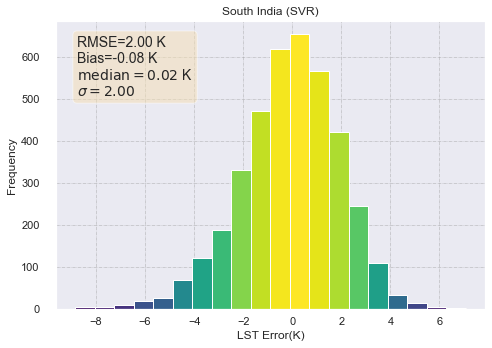

In [19]:

N_points = 10000
n_bins = 20
  
# # Creating distribution
# legend = ['distribution']
  
# Creating histogram
fig, axs = plt.subplots(1, 1,
                        figsize =(7,5), 
                        tight_layout = True)
  
axs.xaxis.set_tick_params(pad = 2) 
axs.yaxis.set_tick_params(pad = 10) 
  
# Add x, y gridlines 
axs.grid(b = True, color ='grey', 
        linestyle ='-.', linewidth = 0.5, 
        alpha = 0.6) 
  
mu = error.mean()
median = np.median(error)
sigma = error.std()

textstr = '\n'.join((r'RMSE=%.2f K' % (RMSE, ),
    r'Bias=%.2f K' % (mu, ),
    r'$\mathrm{median}=%.2f$ K' % (median, ),
    r'$\sigma=%.2f$' % (sigma, )))

# these are matplotlib.patch.Patch properties
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

# place a text box in upper left in axes coords
axs.text(0.05, 0.95, textstr, transform=axs.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)

# Creating histogram
N, bins, patches = axs.hist(error, bins = n_bins)
  
# Setting color
fracs = ((N**(1 / 5)) / N.max())
norm = colors.Normalize(fracs.min(), fracs.max())
  
for thisfrac, thispatch in zip(fracs, patches):
    color = plt.cm.viridis(norm(thisfrac))
    thispatch.set_facecolor(color)
  
plt.xlabel("LST Error(K)")
plt.ylabel("Frequency")
# plt.legend(legend)
plt.title('South India (SVR)')
plt.savefig(r'E:\South India (SVR).jpeg',dpi=400)
plt.show()


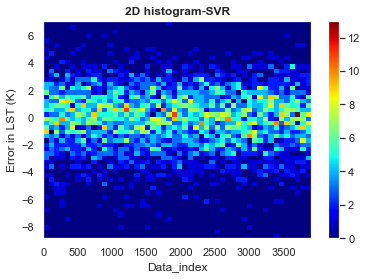

In [20]:
plt.hist2d(np.arange(0,len(error)),error, (50, 50), cmap=plt.cm.jet)
plt.colorbar()
plt.xlabel("Data_index")
plt.ylabel("Error in LST (K)")
plt.title('2D histogram-SVR', fontweight ="bold")
  
plt.show()

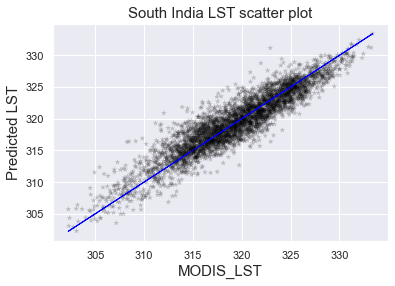

In [21]:
plt.scatter(Y_test,Y_pred,c='Black',marker='*',alpha=0.2,edgecolors='none')
plt.title("South India LST scatter plot",fontsize=15)
plt.ylabel("Predicted LST",fontsize=15)
plt.xlabel("MODIS_LST",fontsize=15)
plt.plot(Y_test,Y_test,c='blue',lw=1)
plt.savefig(r'E:\South India LST scatter plot.jpeg',dpi=400)
plt.show()


# Testing over central india using south india SVR algorithm

In [22]:
d=pd.read_csv('E:/rahul/processed_data/Central_india.csv',index_col=[0])
d['(36V-18V)^2']=(d['BT_36V']-d['BT_18V'])**2

d_y0=d['MODIS_LST']
d_x0=d[["BT_6V","BT_6H","BT_10V","BT_10H","BT_18V","BT_18H","BT_36V","BT_36H","BT_89V","BT_89H","(36V-18V)^2"]]

dY_pred=sc_Y.inverse_transform(regressor.predict(sc_X.transform(d_x0)))
print("R-Square: ",r2_score(d_y0,dY_pred))

df=pd.DataFrame({})
df['MOD_LST']=d_y0
df['pred_LST']=dY_pred
df['Error']=d_y0-dY_pred
df.describe()

R-Square:  -0.08675295847185116


,MOD_LST,pred_LST,Error
count,12922.000000,12922.000000,12922.000000
mean,321.865103,324.317680,-2.452578
std,4.543312,4.200596,4.051766
min,305.191925,306.815192,-26.078869
25%,318.748138,321.457096,-4.752239
50%,322.008713,324.639533,-1.957393
75%,325.203461,327.576748,0.216103
max,334.007965,340.023267,14.662531


RMSE:  4.736 K


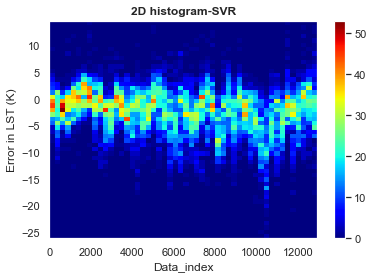

In [23]:
error=df['Error']
RMSE=np.round(mean_squared_error(d_y0,dY_pred,squared=False),decimals=3)
print("RMSE: ",RMSE,"K")

plt.hist2d(np.arange(0,len(error)),error, (50, 50), cmap=plt.cm.jet)
plt.colorbar()
plt.xlabel("Data_index")
plt.ylabel("Error in LST (K)")
plt.title('2D histogram-SVR', fontweight ="bold")
plt.show()

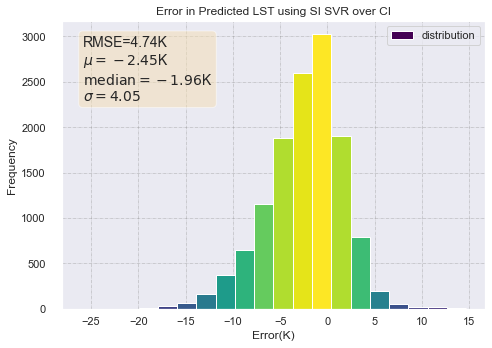

In [24]:

N_points = 10000
n_bins = 20
  
# # Creating distribution
# legend = ['distribution']
  
# Creating histogram
fig, axs = plt.subplots(1, 1,
                        figsize =(7,5), 
                        tight_layout = True)
  
axs.xaxis.set_tick_params(pad = 2) 
axs.yaxis.set_tick_params(pad = 10) 
  
# Add x, y gridlines 
axs.grid(b = True, color ='grey', 
        linestyle ='-.', linewidth = 0.5, 
        alpha = 0.6) 
  
mu = error.mean()
median = np.median(error)
sigma = error.std()

textstr = '\n'.join((r'RMSE=%.2fK' % (RMSE, ),
    r'$\mu=%.2f$K' % (mu, ),
    r'$\mathrm{median}=%.2f$K' % (median, ),
    r'$\sigma=%.2f$' % (sigma, )))

# these are matplotlib.patch.Patch properties
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

# place a text box in upper left in axes coords
axs.text(0.05, 0.95, textstr, transform=axs.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)

# Creating histogram
N, bins, patches = axs.hist(error, bins = n_bins)
  
# Setting color
fracs = ((N**(1 / 5)) / N.max())
norm = colors.Normalize(fracs.min(), fracs.max())
  
for thisfrac, thispatch in zip(fracs, patches):
    color = plt.cm.viridis(norm(thisfrac))
    thispatch.set_facecolor(color)
  
plt.xlabel("Error(K)")
plt.ylabel("Frequency")
plt.legend(legend)
plt.title('Error in Predicted LST using SI SVR over CI')
plt.show()

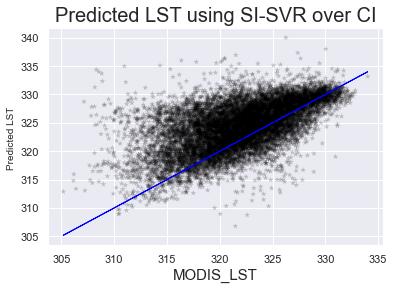

In [25]:
plt.scatter(d_y0,dY_pred,c='Black',marker='*',alpha=0.2,edgecolors='none')
plt.title("Predicted LST using SI-SVR over CI",fontsize=20)
plt.ylabel("Predicted LST ",fontsize=10)
plt.xlabel("MODIS_LST",fontsize=15)
plt.plot(d_y0,d_y0,c='blue',lw=1)
plt.show()

# North india data for testing

In [26]:
d=pd.read_csv('E:/rahul/processed_data/North_india.csv',index_col=[0])
d['(36V-18V)^2']=(d['BT_36V']-d['BT_18V'])**2

d_y0=d['MODIS_LST']
d_x0=d[["BT_6V","BT_6H","BT_10V","BT_10H","BT_18V","BT_18H","BT_36V","BT_36H","BT_89V","BT_89H","(36V-18V)^2"]]

dY_pred=sc_Y.inverse_transform(regressor.predict(sc_X.transform(d_x0)))
print("R-Square: ",r2_score(d_y0,dY_pred))

df=pd.DataFrame({})
df['MOD_LST']=d_y0
df['pred_LST']=dY_pred
df['Error']=d_y0-dY_pred
df.describe()

R-Square:  -0.7885553395720455


,MOD_LST,pred_LST,Error
count,27484.000000,27484.000000,27484.000000
mean,318.108768,324.777337,-6.668569
std,7.059222,7.333978,6.682586
min,271.113190,292.485585,-43.826426
25%,313.723068,319.246131,-10.369373
50%,318.805344,325.166567,-6.538769
75%,323.001244,329.813558,-3.116636
max,339.174805,345.663583,22.656313


RMSE:  9.441 K


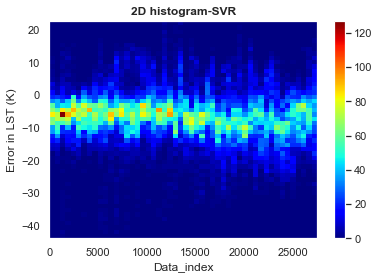

In [27]:
error=df['Error']
RMSE=np.round(mean_squared_error(d_y0,dY_pred,squared=False),decimals=3)
print("RMSE: ",RMSE,"K")

plt.hist2d(np.arange(0,len(error)),error, (50, 50), cmap=plt.cm.jet)
plt.colorbar()
plt.xlabel("Data_index")
plt.ylabel("Error in LST (K)")
plt.title('2D histogram-SVR', fontweight ="bold")
plt.show()

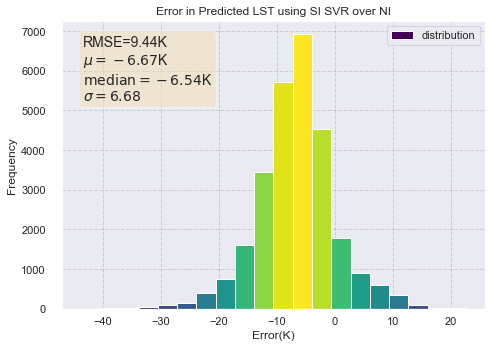

In [28]:
N_points = 10000
n_bins = 20
  
# # Creating distribution
# legend = ['distribution']
  
# Creating histogram
fig, axs = plt.subplots(1, 1,
                        figsize =(7,5), 
                        tight_layout = True)
  
axs.xaxis.set_tick_params(pad = 2) 
axs.yaxis.set_tick_params(pad = 10) 
  
# Add x, y gridlines 
axs.grid(b = True, color ='grey', 
        linestyle ='-.', linewidth = 0.5, 
        alpha = 0.6) 
  
mu = error.mean()
median = np.median(error)
sigma = error.std()

textstr = '\n'.join((r'RMSE=%.2fK' % (RMSE, ),
    r'$\mu=%.2f$K' % (mu, ),
    r'$\mathrm{median}=%.2f$K' % (median, ),
    r'$\sigma=%.2f$' % (sigma, )))

# these are matplotlib.patch.Patch properties
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

# place a text box in upper left in axes coords
axs.text(0.05, 0.95, textstr, transform=axs.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)

# Creating histogram
N, bins, patches = axs.hist(error, bins = n_bins)
  
# Setting color
fracs = ((N**(1 / 5)) / N.max())
norm = colors.Normalize(fracs.min(), fracs.max())
  
for thisfrac, thispatch in zip(fracs, patches):
    color = plt.cm.viridis(norm(thisfrac))
    thispatch.set_facecolor(color)
  
plt.xlabel("Error(K)")
plt.ylabel("Frequency")
plt.legend(legend)
plt.title('Error in Predicted LST using SI SVR over NI')
plt.show()

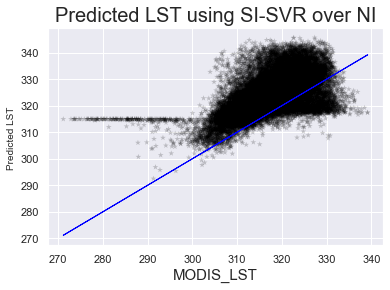

In [29]:
plt.scatter(d_y0,dY_pred,c='Black',marker='*',alpha=0.2,edgecolors='none')
plt.title("Predicted LST using SI-SVR over NI",fontsize=20)
plt.ylabel("Predicted LST ",fontsize=10)
plt.xlabel("MODIS_LST",fontsize=15)
plt.plot(d_y0,d_y0,c='blue',lw=1)
plt.show()

# Testing over south INDIA but Year 2007

In [30]:
d=pd.read_csv(r'E:\rahul\processed_data\MAY_2007\South_india.csv',index_col=[0])
d['(36V-18V)^2']=(d['BT_36V']-d['BT_18V'])**2

d_y0=d['MODIS_LST']
d_x0=d[["BT_6V","BT_6H","BT_10V","BT_10H","BT_18V","BT_18H","BT_36V","BT_36H","BT_89V","BT_89H","(36V-18V)^2"]]

dY_pred=sc_Y.inverse_transform(regressor.predict(sc_X.transform(d_x0)))
print("R-Square: ",r2_score(d_y0,dY_pred))

df=pd.DataFrame({})
df['MOD_LST']=d_y0
df['pred_LST']=dY_pred
df['Error']=d_y0-dY_pred
df.describe()

R-Square:  0.7648271437874803


,MOD_LST,pred_LST,Error
count,1482.000000,1482.000000,1482.000000
mean,319.303220,319.661295,-0.358075
std,5.084099,4.740650,2.439356
min,302.679199,304.903696,-13.168251
25%,316.039055,317.095353,-1.876815
50%,319.509689,319.662745,-0.273878
75%,322.752754,322.624959,1.184255
max,330.898590,332.226982,11.156967


RMSE:  2.465 K


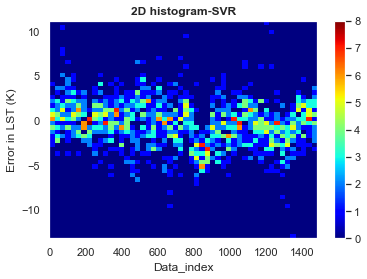

In [31]:
error=df['Error']
RMSE=np.round(mean_squared_error(d_y0,dY_pred,squared=False),decimals=3)
print("RMSE: ",RMSE,"K")

plt.hist2d(np.arange(0,len(error)),error, (50, 50), cmap=plt.cm.jet)
plt.colorbar()
plt.xlabel("Data_index")
plt.ylabel("Error in LST (K)")
plt.title('2D histogram-SVR', fontweight ="bold")
plt.show()

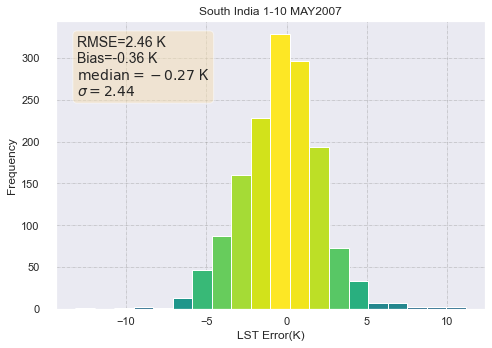

In [32]:
N_points = 10000
n_bins = 20
  
# # Creating distribution
# legend = ['distribution']
  
# Creating histogram
fig, axs = plt.subplots(1, 1,
                        figsize =(7,5), 
                        tight_layout = True)
  
axs.xaxis.set_tick_params(pad = 2) 
axs.yaxis.set_tick_params(pad = 10) 
  
# Add x, y gridlines 
axs.grid(b = True, color ='grey', 
        linestyle ='-.', linewidth = 0.5, 
        alpha = 0.6) 
  
mu = error.mean()
median = np.median(error)
sigma = error.std()

textstr = '\n'.join((r'RMSE=%.2f K' % (RMSE, ),
    r'Bias=%.2f K' % (mu, ),
    r'$\mathrm{median}=%.2f$ K' % (median, ),
    r'$\sigma=%.2f$' % (sigma, )))

# these are matplotlib.patch.Patch properties
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

# place a text box in upper left in axes coords
axs.text(0.05, 0.95, textstr, transform=axs.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)

# Creating histogram
N, bins, patches = axs.hist(error, bins = n_bins)
  
# Setting color
fracs = ((N**(1 / 5)) / N.max())
norm = colors.Normalize(fracs.min(), fracs.max())
  
for thisfrac, thispatch in zip(fracs, patches):
    color = plt.cm.viridis(norm(thisfrac))
    thispatch.set_facecolor(color)
  
plt.xlabel("LST Error(K)")
plt.ylabel("Frequency")
# plt.legend(legend)
plt.title('South India 1-10 MAY2007')
plt.savefig(r'E:\South India 1-10 MAY2007.jpeg',dpi=400)
plt.show()


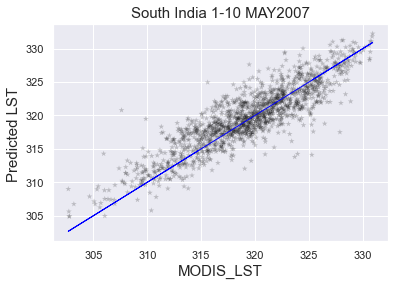

In [33]:
plt.scatter(d_y0,dY_pred,c='Black',marker='*',alpha=0.2,edgecolors='none')
plt.title("South India 1-10 MAY2007",fontsize=15)
plt.ylabel("Predicted LST ",fontsize=15)
plt.xlabel("MODIS_LST",fontsize=15)
plt.plot(d_y0,d_y0,c='blue',lw=1)
plt.savefig(r'E:\South India LST 1-10 MAY2007.jpeg',dpi=400)
plt.show()
